In [19]:
plt.style.use('ggplot')
import numpy as np
from scipy import io as spio
import matplotlib.pyplot as plt
from jupyterthemes import jtplot


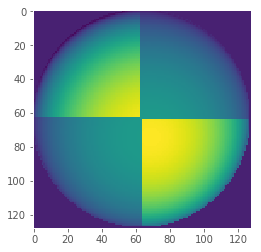

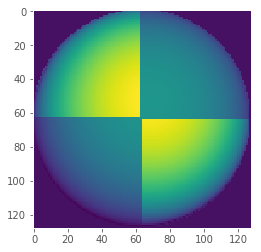

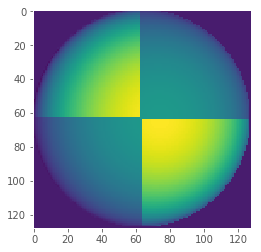

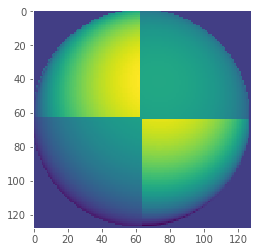

In [38]:
photos = spio.loadmat('photos.mat')
I = np.array([photos['I' + str(i)] for i in range(1, 5)])

plt.imshow(photos['I1'])
plt.grid(0)
plt.show()
plt.imshow(photos['I2'])
plt.grid(0)
plt.show()
plt.imshow(photos['I3'])
plt.grid(0)
plt.show()
plt.imshow(photos['I4'])
plt.grid(0)
plt.show()

In [101]:
V = np.array([[0.085832,  0.17365, 0.98106],
              [0.085832, -0.17365, 0.98106],
              [0.17365 ,  0.00000, 0.98481],
              [0.16318 , -0.34202, 0.92542]])

In [43]:
from autograd.numpy import linalg as la
#Equation 10 
g = la.inv(V.T.dot(V)).dot(V.T).dot(I.swapaxes(0, 1))
#Equation 11
n = g/g.size #this is a vector
#Equation 14
dfdx = np.nan_to_num(-n[0]/n[2])
dfdy = np.nan_to_num(-n[1]/n[2])

C:\Users\MaryChrisGo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\MaryChrisGo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [98]:
import scipy.fftpack as fft
#getting the shape
shape1, shape2 = dfdx.shape #128x128

#Get the meshgrid of the shape of dfdx for x-axis and y-axis
x, y = np.meshgrid(np.arange(shape2), np.arange(shape1))

#elevation
w_x, w_y = np.meshgrid(fft.fftfreq(shape2)*2*np.pi,
                     fft.fftfreq(shape1)*2*np.pi)
upper = -1j*w_x*fft.fft2(dfdx) - 1j*w_y*fft.fft2(dfdy)
lower = w_x**2 + w_y**2 + np.finfo(float).eps
res = fft.ifft2(upper/lower)
z = res.real

C:\Users\MaryChrisGo\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


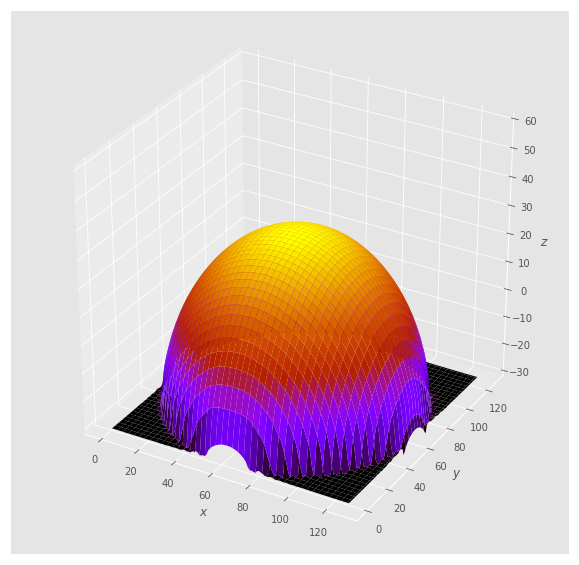

In [99]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='gnuplot')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_zlim(-30, 60)
plt.show()